# 09 Terminal locations

The default location for the terminals is on the left for both postive and negative busbars. This can be changed with the `terminals` argument of the `setup_circuit` function.

In [24]:
try:
    import liionpack as lp
except:
    !pip install -q git+https://github.com/pybamm-team/liionpack.git@main
    import liionpack as lp
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
? lp.setup_circuit

Signature:
 lp.setup_circuit(
    Np=1,
    Ns=1,
    Ri=0.01,
    Rc=0.01,
    Rb=0.0001,
    Rt=1e-05,
    I=80.0,
    V=4.2,
    plot=False,
    terminals='left',
)
Docstring:
Define a netlist from a number of batteries in parallel and series

Args:
    Np (int): Number of batteries in parallel.
    Ns (int): Number of batteries in series.
    Ri (float): Internal resistance ($\Omega$).
    Rc (float): Connection resistance ($\Omega$).
    Rb (float): Busbar resistance ($\Omega$).
    Rt (float): Terminal connection resistance ($\Omega$).
    I (float): Current (A).
    V (float): Initial battery voltage (V).
    plot (bool): Plot the circuit.
    terminals (string): The location of the terminals. Can be "left", "right",
    "left-right", "right-left" or a list or array of node integers.

Returns:
    pandas.DataFrame:
        A netlist of circuit elements with format desc, node1, node2, value.
File:      c:\users\tom\code\pybamm_liionpack\liionpack\netlist_utils.py
Type:      funct

Lets explore the options and draw the circuits

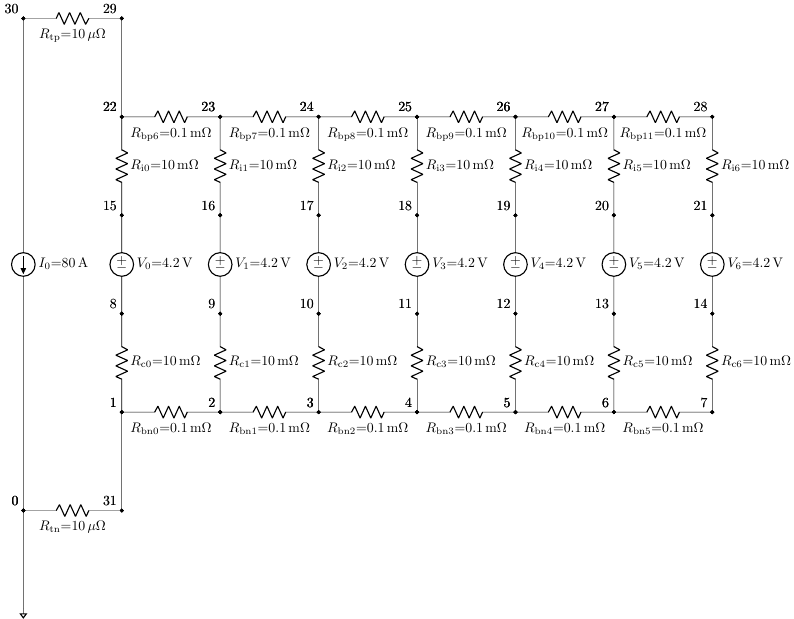

In [15]:
net_left = lp.setup_circuit(Np=7, Ns=1, terminals="left")
lp.draw_circuit(net_left, dpi=100)

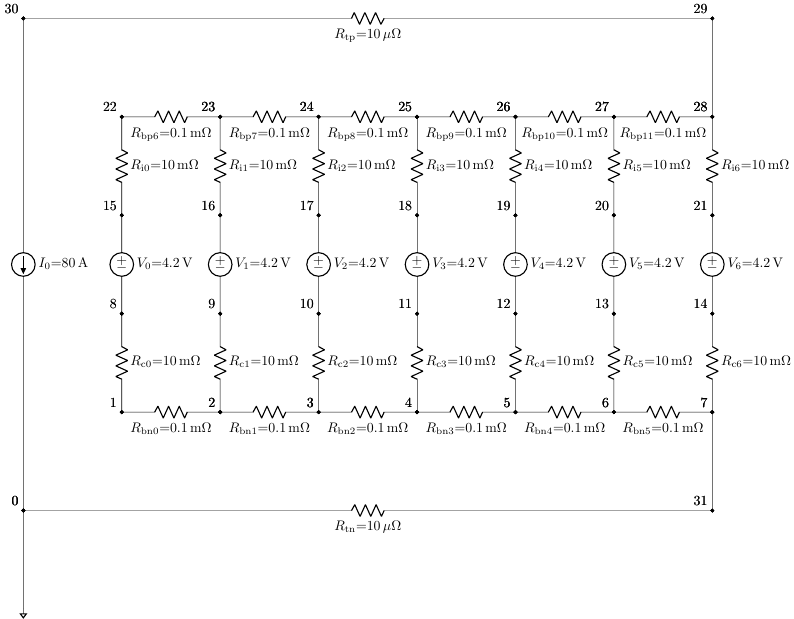

In [16]:
net_right = lp.setup_circuit(Np=7, Ns=1, terminals="right")
lp.draw_circuit(net_right, dpi=100)

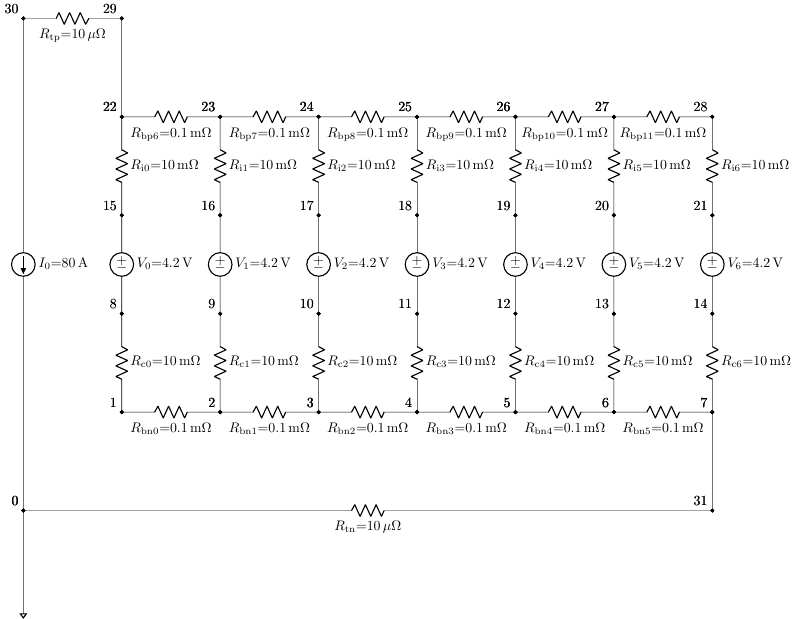

In [18]:
net_left_right = lp.setup_circuit(Np=7, Ns=1, terminals="left-right")
lp.draw_circuit(net_left_right, dpi=100)

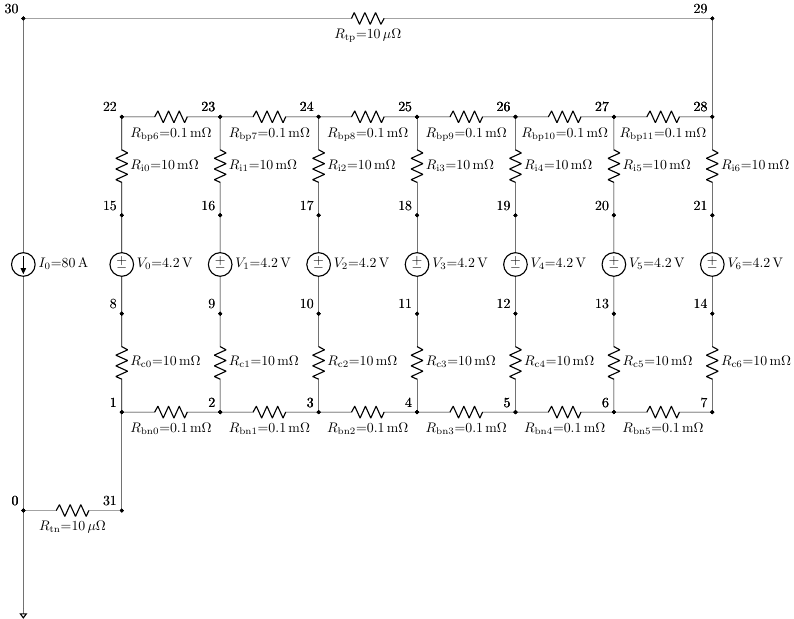

In [19]:
net_right_left = lp.setup_circuit(Np=7, Ns=1, terminals="right-left")
lp.draw_circuit(net_right_left, dpi=100)

Those were the text-based commands which are limited to connecting to the ends of the busbars. Connections to other nodes along the busbars are specified by relative node index `[Nbp, Nbn]` using a list or array specifying the node for the postive and negative connections respectively.

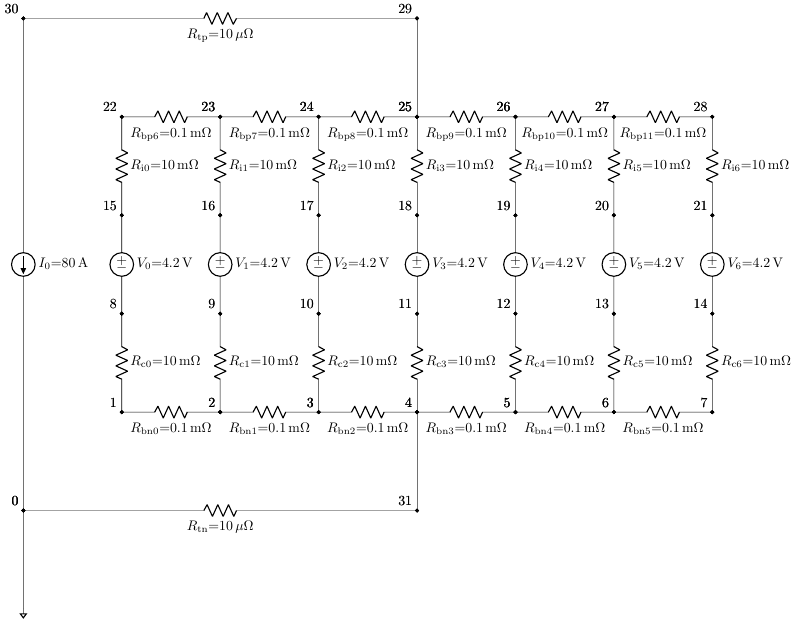

In [22]:
net_middle = lp.setup_circuit(Np=7, Ns=1, terminals=[3, 3])
lp.draw_circuit(net_middle, dpi=100)

The terminal locations have a rather stark impact on the current distribution in the pack as will now be demonstrated.

Stepping simulation: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 93.99it/s]


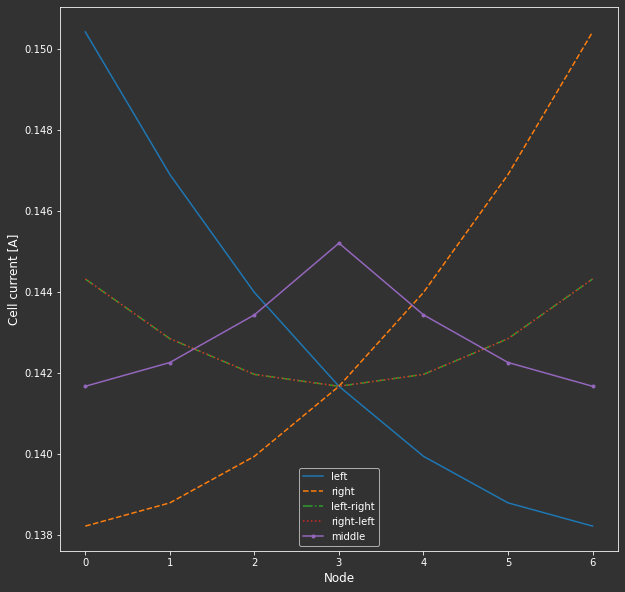

In [30]:
netlists = [net_left, net_right, net_left_right, net_right_left, net_middle]
labels = ["left", "right", "left-right", "right-left", "middle"]
lines = ["-", "--", "-.", ":", ".-"]
with plt.rc_context(lp.lp_context):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for i, netlist in enumerate(netlists):
        chemistry = pybamm.parameter_sets.Chen2020
        param = pybamm.ParameterValues(chemistry=chemistry)
        experiment = pybamm.Experiment(
            [
                f"Discharge at 1 A for 1 minutes",
            ],
            period="10 seconds",
        )
        # Solve pack
        output = lp.solve(
            netlist=netlist,
            parameter_values=param,
            experiment=experiment,
            output_variables=None,
            initial_soc=0.5,
        )
        plt.plot(range(7), output["Cell current [A]"][-1, :], lines[i], label=labels[i])
    ax.set_xlabel("Node")
    ax.set_ylabel("Cell current [A]")
    plt.legend()
